# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import K
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV`


from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [5]:
df = pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,102,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [10]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
268/500

0.536

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [7]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10,stratify=y)

In [8]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
160,151,90,38,0,29.7,0.294,36
610,106,54,21,158,30.9,0.292,24
635,104,72,0,0,31.2,0.465,38
578,133,68,0,0,27.0,0.245,36
41,133,84,0,0,40.2,0.696,37
...,...,...,...,...,...,...,...
735,95,60,32,0,35.4,0.284,28
475,137,84,27,0,27.3,0.231,59
577,118,80,0,0,42.9,0.693,21
767,93,70,31,0,30.4,0.315,23


## Model Trainig

In [24]:
adb_clf = AdaBoostClassifier(n_estimators=80,random_state = 20)
adb_clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=80, random_state=20)

In [25]:
## Testing Data Evalaution
y_pred = adb_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score :",acc_score)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :",clf_report)

Confusion Matrix :
 [[123  27]
 [ 22  59]]
Accuracy Score : 0.7878787878787878
Classification Report :               precision    recall  f1-score   support

           0       0.85      0.82      0.83       150
           1       0.69      0.73      0.71        81

    accuracy                           0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



In [26]:
## Training Data Evalaution
y_pred_train = adb_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score :",acc_score)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :",clf_report)

Confusion Matrix :
 [[315  35]
 [ 52 135]]
Accuracy Score : 0.8379888268156425
Classification Report :               precision    recall  f1-score   support

           0       0.86      0.90      0.88       350
           1       0.79      0.72      0.76       187

    accuracy                           0.84       537
   macro avg       0.83      0.81      0.82       537
weighted avg       0.84      0.84      0.84       537



<AxesSubplot:>

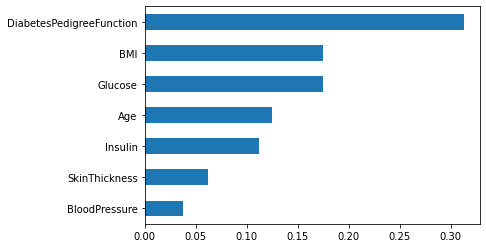

In [31]:
s1 = pd.Series(adb_clf.feature_importances_,index=x.columns)
s1.sort_values().plot(kind= 'barh')